Get Z and effect size for wilcoxon test

In [83]:
import pandas as pd
from scipy.stats import friedmanchisquare, wilcoxon
from scipy import stats
import math
import statsmodels.stats.descriptivestats as ols

In [79]:
from statsmodels import stats

In [124]:
df_ai = pd.read_csv('/Users/sjjin/workspace/hci_lab/nasa_tlx/nasa_tlx_w_ai.csv', index_col=0)
df_wo_ai = pd.read_csv('/Users/sjjin/workspace/hci_lab/nasa_tlx/nasa_tlx_wo_ai.csv', index_col=0)

In [23]:
len(df_ai)

22

In [119]:
df_wo_ai.head(5)

,Participant ID,Video,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
1,10,CCC,85,20,100,45,80,80
2,12,CCC,40,0,10,20,25,5
3,14,CCC,80,10,70,25,70,15
4,15,CCC,90,85,10,5,95,75
5,18,CCC,30,10,0,10,60,10


In [120]:
df_ai.head(5)

,Participant ID,Video,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
1,11,CCC,65,5,25,0,75,0
2,13,CCC,15,25,30,25,25,5
3,16,CCC,0,5,5,5,0,5
4,17,CCC,30,10,0,15,25,0
5,1,CCC,60,0,65,15,45,10


In [14]:
columns = df_ai.columns[2:]

In [15]:
columns

Index(['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance',
       'Effort', 'Frustration'],
      dtype='object')

In [84]:
ols.sign_test(df_ai['Mental Demand'])

(10.5, 9.5367431640625e-07)

In [132]:
"""Test for normality
Reject if p < 0.05, that the values aren't from a normal distribution
"""
def get_shapiro_stats(df, columns, ai):
    print("Shapiro test for normality")
    not_rejected = []
    rejected = []
    if ai:
        print('With AI')
    else:
        print("Without AI")
    for col in columns:
        W, p = stats.shapiro(df[col])
        if p < 0.05:
            #print("**Reject H0 %s" % col)
            print("reject col: %s, W:%s,p: %s\n" % (col, W, p))
            rejected.append(col)
        else:
            #print("**Fail to reject H0 %s" % col)
            print("col: %s, W:%s, p: %s\n" % (col, W, p))
            not_rejected.append(col)
            

    print("rejected %s" % rejected)
    print("not rejected %s" % not_rejected)

In [129]:
print(list(df_ai['Mental Demand']))

[65, 15, 0, 30, 60, 75, 70, 30, 25, 45, 20, 20, 90, 25, 45, 65, 25, 20, 65, 60, 65, 40]


In [133]:
get_shapiro_stats(df_ai, columns, True)

Shapiro test for normality
With AI
col: Mental Demand, W:0.9436333775520325, p: 0.23503226041793823

reject col: Physical Demand, W:0.8109356164932251,p: 0.0007457808242179453

col: Temporal Demand, W:0.9383642077445984, p: 0.18310892581939697

reject col: Performance, W:0.8015027046203613,p: 0.0005282271886244416

col: Effort, W:0.9705166220664978, p: 0.7229670286178589

reject col: Frustration, W:0.8730742931365967,p: 0.008934784680604935

rejected ['Physical Demand', 'Performance', 'Frustration']
not rejected ['Mental Demand', 'Temporal Demand', 'Effort']


In [134]:
get_shapiro_stats(df_wo_ai, columns, False)

Shapiro test for normality
Without AI
reject col: Mental Demand, W:0.8962306380271912,p: 0.02500559203326702

reject col: Physical Demand, W:0.7686020135879517,p: 0.0001678814587648958

col: Temporal Demand, W:0.9337881803512573, p: 0.14713583886623383

col: Performance, W:0.9469814300537109, p: 0.2748503088951111

col: Effort, W:0.9700272083282471, p: 0.7116779685020447

col: Frustration, W:0.9138799905776978, p: 0.0568423792719841

rejected ['Mental Demand', 'Physical Demand']
not rejected ['Temporal Demand', 'Performance', 'Effort', 'Frustration']


In [141]:
"""Convert two-tailed p to z"""
def normz(p):
    #return stats.norm.ppf(p)
    return stats.norm.ppf((1+p)/2)

In [55]:
def get_effect_size(z, n):
    return z / math.sqrt(n)

In [139]:
"""Wilcoxon. Assumes normality of data
p < 0.05: Not from same distribution
p > 0.05: From same distribution.
"""
def get_wilcoxon_stats(df1, df2, columns):
    print("Shapiro test for normality")
    not_rejected = []
    rejected = []

    for col in columns:
        statistic, p = stats.wilcoxon(df_ai[col], df_wo_ai[col])
        z = normz(p)
        effect_size = get_effect_size(z, len(df_ai[col]))
        alpha = 0.05
        if p < alpha:
            #print("**Reject H0 %s" % col)
            print('Different distribution (reject H0)')
            print("col: %s, W: %0.6f, p: %0.6f, z: %0.6f, effect_size: %0.6f\n" % (col, W, p, z, effect_size))
            rejected.append(col)
        else:
            print('Same distribution (fail to reject H0)')
            #print("**Fail to reject H0 %s" % col)
            print("col: %s, W: %0.6f, p: %0.6f, z: %0.6f, effect_size: %0.6f\n" % (col, W, p, z, effect_size))

            not_rejected.append(col)
            

    print("rejected %s" % rejected)
    print("not rejected %s" % not_rejected)

In [142]:
get_wilcoxon_stats(df_ai, df_wo_ai, columns)

Shapiro test for normality
Different distribution (reject H0)
col: Mental Demand, W: 0.873074, p: 0.012898, z: -2.229268, effect_size: -0.475282

Same distribution (fail to reject H0)
col: Physical Demand, W: 0.873074, p: 0.524822, z: 0.062259, effect_size: 0.013274

Same distribution (fail to reject H0)
col: Temporal Demand, W: 0.873074, p: 0.148563, z: -1.042616, effect_size: -0.222287

Same distribution (fail to reject H0)
col: Performance, W: 0.873074, p: 0.721867, z: 0.588396, effect_size: 0.125446

Different distribution (reject H0)
col: Effort, W: 0.873074, p: 0.029263, z: -1.891741, effect_size: -0.403320

Different distribution (reject H0)
col: Frustration, W: 0.873074, p: 0.013899, z: -2.200132, effect_size: -0.469070

rejected ['Mental Demand', 'Effort', 'Frustration']
not rejected ['Physical Demand', 'Temporal Demand', 'Performance']


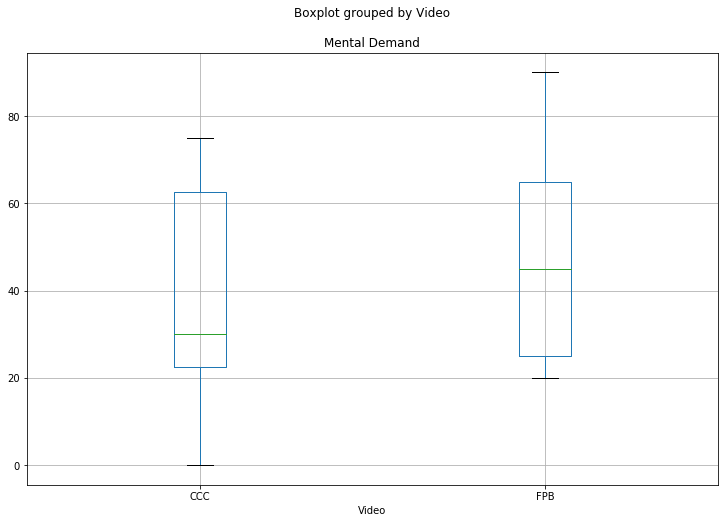

In [21]:
boxplot = df_ai.boxplot(columns[0], by='Video', figsize=(12, 8))